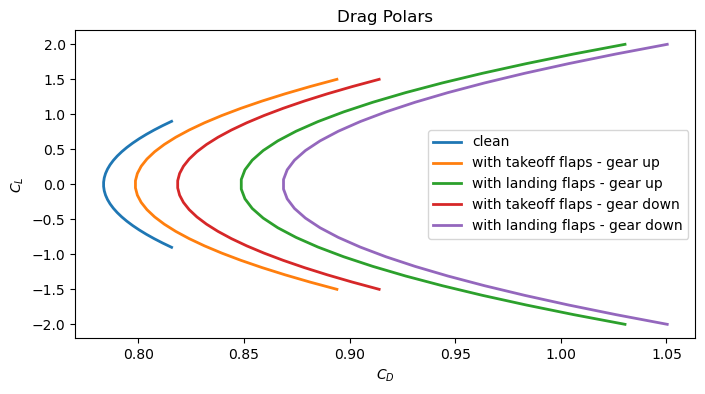

cL_min = 4.5


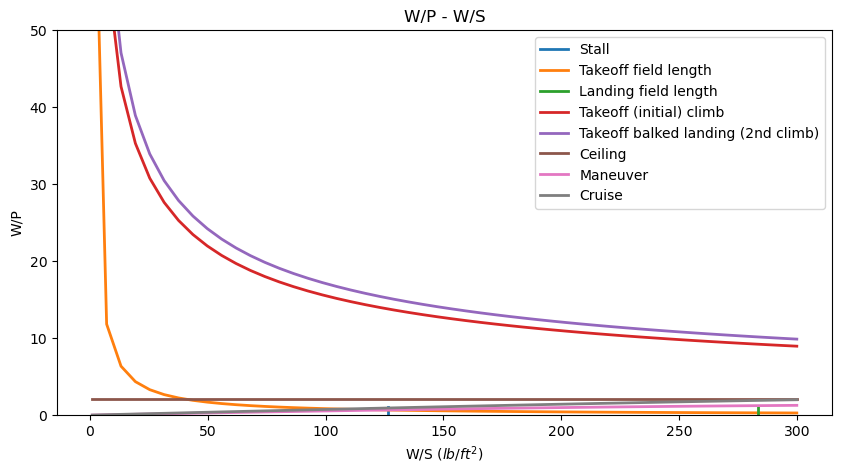

In [16]:
# EAE 130A - Aircraft Performance and Design
# Assignment 3 - Drag Polar
# Group 9
# 13 February 2025


import numpy as math 
import matplotlib.pyplot as plt

# Power to weight ratio converter function
def pwr(thurst_weight_ratio, eta_p, V):
    return thurst_weight_ratio / (550 * eta_p / V)


S_ref = 4605 # float(input("Enter the reference wing area (ft^2): "))
S_wet = 4605 * 142.45 # float(input("Enter the reference wing wet area (ft^2): "))
W_0 = 766800 # float(input("Enter the takeoff gross weight (lbs): "))

# DRAG POLAR
# From Metabook pg. 35
# From Figure 3.6 of Raymer's text, wetted area to reference wing area has been estimated to be 4 (Cessna Skyline RG)

S_wet_S_ref =  S_wet / S_ref # 4 - from Raymer's text
c_f = 0.0055 # figure 4.4 on Metabook - "light aircraft - single engine"

parasite_drag_coeff = c_f * S_wet_S_ref

AR = 10 # using typical aspect ratio for estimations - NEED ACTUAL VALUE


cL_clean = math.linspace(-0.9, 0.9, 30)
cL_takeoff = math.linspace(-1.5, 1.5, 30)
cL_landing = math.linspace(-2, 2, 30)
cL_takeoff2 = math.linspace(-2.1, 2.1, 30)
cL_landing2 = math.linspace(-2.5, 2.5, 30)

eff_clean = 0.8 #float(input("Enter the Oswald efficiency for clean configuration (0.80 ~ 0.85): "))
eff_takeoff = 0.75 #float(input("Enter the Oswald efficiency for takeoff flaps configuration (0.75 ~ 0.80): "))
eff_landing_flaps = 0.7 #float(input("Enter the Oswald efficiency for landing flaps configuration (0.70 ~ 0.75): "))

delta_cD0_takeoff = 0.015 #float(input("Enter the change in parasite drag coefficient (C_D0) for takeoff flaps (0.010 ~ 0.020): "))
delta_cD0_landing_flaps = 0.065 #float(input("Enter the change in parasite drag coefficient (C_D0) for landing flaps (0.055 ~ 0.075): "))
delta_cD0_landing_gear = 0.02 #float(input("Enter the change in parasite drag coefficient (C_D0) for landing gear (0.015 ~ 0.025): "))

# Clean drag polar
cD_clean = parasite_drag_coeff + (1 / (math.pi * eff_clean * AR)) * (cL_clean ** 2)

# Takeoff flaps - gear up drag polar
cD_takeoff_1 = (parasite_drag_coeff + delta_cD0_takeoff) + (1 / (math.pi * eff_takeoff * AR)) * (cL_takeoff ** 2)

# Landing flaps - gear up drag polar
cD_landing_flaps_1 = (parasite_drag_coeff + delta_cD0_landing_flaps) + (1 / (math.pi * eff_landing_flaps * AR)) * (cL_landing ** 2)

# Takeoff flaps - gear down drag polar - this is here in case we decide to do a retractable one
cD_takeoff_2 = (parasite_drag_coeff + delta_cD0_takeoff + delta_cD0_landing_gear) + (1 / (math.pi * eff_takeoff * AR)) * (cL_takeoff ** 2)

# Landing flaps - gear down drag polar - this is here in case we decide to do a retractable one
cD_landing_flaps_2 = (parasite_drag_coeff + delta_cD0_landing_flaps + delta_cD0_landing_gear) + (1 / (math.pi * eff_landing_flaps * AR)) * (cL_landing ** 2)

# Landing gear drag polar
# cD_landing_gear = (parasite_drag_coeff + delta_cD0_landing_gear) + (1 / (math.pi * eff_clean * AR)) * (cL_landing ** 2) # Just used the clean efficiency here 
# (DELETE LATER: looks like that's what the sample code did as well)

plt.figure(figsize=(8,4))
plt.title('Drag Polars')
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.plot(cD_clean, cL_clean, label='clean', linestyle='-', linewidth=2)
plt.plot(cD_takeoff_1, cL_takeoff, label='with takeoff flaps - gear up', linestyle='-', linewidth=2)
plt.plot(cD_landing_flaps_1, cL_landing, label='with landing flaps - gear up', linestyle='-', linewidth=2)
plt.plot(cD_takeoff_2, cL_takeoff, label='with takeoff flaps - gear down', linestyle='-', linewidth=2) # if retractable
plt.plot(cD_landing_flaps_2, cL_landing, label='with landing flaps - gear down', linestyle='-', linewidth=2) # if retractable
# plt.plot(cD_landing_gear, cL_landing, label='with landing gear', linestyle='-', linewidth=2)
plt.legend(loc='best')
plt.show()



### POWER LOADING VS WING LOADING

## FROM WEIGHT ESTIMATION CODE ##
lift2drag_ratio_max = 13 # around 13 for design 2 using the b^2/s_wet vs. L/D ratio # float(input("Enter the MAX L/D ratio: "))

lift2drag_ratio = 0.94 * lift2drag_ratio_max

Range = 600  # nmi - from RFP "range is the distance flown - use for cruise" lec03
Endurance = 30 / 60  # 30 min -> 0.5 hr from RFP "endurance is the time flown - use for loiter" lec03
c = 0.595 # float(input("Enter the specific fuel consumption value 'c' [1/s]: "))  # Updated units for clarity
velocity = 250 * 1.69  # knots to ft/s - maximum operational speed - from RFP

# Cruising
W5_W4 = math.exp((-Range * c) / (velocity * lift2drag_ratio))  # weight fraction during cruising
# Loitering
W7_W6 = math.exp((-Endurance * c) / (lift2drag_ratio))  # weight fraction during loitering

# For final weight fraction calculations, we are using the typical weight fractions
# Warmup (0.996), Taxi (0.995), Takeoff (0.996), Climb (0.998), Descent (0.999), and Landing (0.998)

W1_W0 = 0.996  # weight fraction for warm-up
W2_W1 = 0.995  # weight fraction for taxi
W3_W2 = 0.996  # weight fraction for takeoff
W4_W3 = 0.998  # weight fraction for climb
               # calculated weight fraction for cruising
W6_W5 = 0.999  # weight fraction for descent
               # calculated weight fraction for loitering
W8_W7 = 0.999  # weight fraction for descent (2)
W9_W8 = 0.998  # weight fraction for landing

W9_W0 = W9_W8 * W8_W7 * W7_W6 * W6_W5 * W5_W4 * W4_W3 * W3_W2 * W2_W1 * W1_W0
##

# WING LOADING - Metabook pg. 31

# Phase 1 - Warm-Up - in reference to the takeoff weight
W_1 = W1_W0 * W_0
wing_loading_warm_up = (W_1 / S_ref) * (W1_W0)

# Phase 2 - Taxing 
W_2 = W2_W1 * W_1
wing_loading_taxi = (W_2 / S_ref) * (W2_W1 * W1_W0)

# Phase 3 - Takeoff 
W_3 = W3_W2 * W_2
wing_loading_takeoff = (W_3 / S_ref) * (W3_W2 * W2_W1 * W1_W0)

# Phase 4 - Climb 
W_4 = W4_W3 * W_3
wing_loading_climb = (W_4 / S_ref) * (W4_W3 * W3_W2 * W2_W1 * W1_W0)

# Phase 5 - Cruising 
W_5 = W5_W4 * W_4
wing_loading_cruising = (W_5 / S_ref) * (W5_W4 * W4_W3 * W3_W2 * W2_W1 * W1_W0)

# Phase 6 - Descent 
W_6 = W6_W5 * W_5
wing_loading_descent1 = (W_6 / S_ref) * (W6_W5 * W5_W4 * W4_W3 * W3_W2 * W2_W1 * W1_W0)

# Phase 7 - Loitering 
W_7 = W7_W6 * W_6
wing_loading_loitering = (W_7 / S_ref) * (W7_W6 * W6_W5 * W5_W4 * W4_W3 * W3_W2 * W2_W1 * W1_W0)

# Phase 8 - Descent 
W_8 = W8_W7 * W_7
wing_loading_descent2 = (W_8 / S_ref) * (W8_W7 * W7_W6 * W6_W5 * W5_W4 * W4_W3 * W3_W2 * W2_W1 * W1_W0)

# Phase 9 - Landing 
W_9 = W9_W8 * W_8
wing_loading_landing = (W_9 / S_ref) * (W9_W8 * W8_W7 * W7_W6 * W6_W5 * W5_W4 * W4_W3 * W3_W2 * W2_W1 * W1_W0)


# From Roskam pg. 122
# Power loading : W/P
# Power-to-weight ratio : P/W
# eta_p : propeller efficiency - thrust power produced by the propeller 
# (thrust * velocity) divided by the actual power provided by the engine. 

WS = math.linspace(1, 300, 50)
eta_p = 0.6 #float(input("Enter the efficiency of the propeller: "))
V = 250 * 1.688 #float(input("Enter the maximum velocity (ft/s): ")) # Raymer's text pg. 123

# Stall - Metabook pg. 31 & from lec 07 slide 17
rho = 0.00238 # slugs/ft^3 - rho is the seal level standard value - Raymer's pg. 131
V_stall = 220 #float(input("Enter the stall velocity (ft/s): "))
cL_max = 2.2 #float(input("Enter the cL_max of the wing: ")) #Needs to be approximated based on historical data
WS_stall = (1/2) * (rho) * (V_stall)**2 * cL_max

# Takeoff Field Length - Metabook pg. 37
# Sizing to FAR 23 (small aircrafts) requirements for propeller aircraft
s_to = 400 #float(input("Enter the takeoff distance (ft): "))
a = 0.0149
b = 8.134
discriminant = b**2 - 4*a*(-s_to)
top23 = (-b + math.sqrt(discriminant)) / (2*a)

rho_condition = 0.002 #float(input("Enter the air density expected at the field (slug/ft^3): "))
# Metabook pg. 38
power_weight_ratio_takeoff = WS / ((rho_condition / rho) * cL_max * top23)

# Landing distance - Raymer's text pg. 138
s_a = 600 # ft - from Raymer's text pg. 138
approach_speed = 1.3 * V_stall # Metabook pg. 38
landing_time = 45 # float(input("Enter the approximate time it takes for the aircraft to land (s): "))
s_landing = approach_speed * landing_time # in ft
WS_landing = ( (s_landing - s_a) / 80 ) * (rho_condition / rho) * cL_max

# Glide Constrain - set T/W = 0 and find the min C_L and we have to do this for single engine aircraft
#Referencing Raymer's text pg. 146
# C_L = W/qS and W/qS is given as the following equation 
G1 = 0.012 #float(input("Enter the climb gradient of the aircraft during initial climb (G): ")) # G is the climb gradient - ratio between vertical and horizontal distance traveled 
G2 = 0.012 #float(input("Enter the climb gradient of the aircraft during balked landing (G): "))
#Plugging in -G as glide is a climb in the negative direction and setting T/W = 0 
cd_0 = parasite_drag_coeff + delta_cD0_landing_flaps + delta_cD0_landing_gear
cL_min = (-(-G1) + math.sqrt((-(-G1))**2 + (4 * cd_0 / (AR * math.pi * eff_landing_flaps)))) / (2 / (math.pi * AR * eff_landing_flaps))

# only referring to the positive root here as that's what makes most sense 
print("cL_min = " + str(round(cL_min, 2)))


# Climb - formulas using from Matabook pg. 41
L_D_climb = 10 #float(input("Enter the Lift-to-Drag ratio during climb: "))
cL_max_climb = 3 # float(input("Enter the cL_max during climb: "))
# Note that the L / D for climb might be lower than the L / D during cruising ﬂight, 
# especially during initial climb when the gear and ﬂaps might still be down. - Raymer's text pg. 125
#V_vertical = float(input("Enter the vertical velocity during climb (ft/s): "))
# aircraft’s vertical velocity during the climb is usually speciﬁed in the design requirements
# or in military or civilian speciﬁcations (see Appendix F, Table F.2).
# V_vertical = rate of climb - Raymer's text pg. 145

# G >= 0.04 - inital climb
power_weight_ratio_climb1 = ((((G1 + (1 / L_D_climb)) / (math.sqrt((cL_max_climb + 0.2)))) *
                            (WS ** 0.5)) / (18.97 * eta_p * (rho_condition/rho)))
# the + 0.2 comes from Roskam recommending a margin of 0.2 to the CLmax corresponding to the climb configuration. - Metabook pg. 41

#corrected ratio
power_weight_ratio_climb_takeoff1 = (W_4 / W_0) * power_weight_ratio_climb1

# G >= 0.03 - balked landing
power_weight_ratio_climb2 = ((((G2 + (1 / L_D_climb)) / (math.sqrt((cL_max_climb + 0.2)))) *
                            (WS ** 0.5)) / (18.97 * eta_p * (rho_condition/rho)))

#corrected ratio
power_weight_ratio_climb_takeoff2 = (W_9 / W_0) * power_weight_ratio_climb2


# Ceiling - Metabook pg. 42
# q is the dynamic pressure - metabook pg. 42 - very low since we are looking for the min P?W ratio
thurst_weight_ratio_ceiling = 2 * (math.sqrt((parasite_drag_coeff) / (math.pi * AR * eff_clean))) + G1

power_weight_ratio_ceiling = pwr(thurst_weight_ratio_ceiling, eta_p, V)

# Maneuver - Metabook pg. 42

q = (0.5) * (rho_condition) * (V**2)
n = 1.5 # float(input("Enter the load factor (#g): "))

thurst_weight_ratio_maneuver = (( q * parasite_drag_coeff ) / WS) + (WS * (n**2 / (q * math.pi * AR * eff_clean)))

power_weight_ratio_maneuver = pwr(thurst_weight_ratio_maneuver, eta_p, V)

# Cruise - metabook pg. 43
power_weight_ratio_cruise = ((q * V * (parasite_drag_coeff + (((WS**2) * (W_5 / W_0)**2) / ((q**2) * math.pi * AR * eff_clean)))) /
                             (550 * eta_p * WS)) * (0.75) # since P_cruise is around 75% to 80% of rated power - from metabook pg. 43


WS_stall = WS_stall * math.ones(50)
WS_landing = WS_landing * math.ones(50)
power_weight_ratio_ceiling = power_weight_ratio_ceiling * math.ones(50)

plt.figure(figsize=(10,5))
plt.title('W/P - W/S')
plt.xlabel("W/S $(lb/ft^2)$")
plt.ylabel("W/P")
plt.plot(WS_stall, math.linspace(0,1,50), label='Stall', linestyle='-', linewidth=2)
plt.plot(WS, (1/power_weight_ratio_takeoff), label='Takeoff field length', linestyle='-', linewidth=2)
plt.plot(WS_landing, math.linspace(0,1,50), label='Landing field length', linestyle='-', linewidth=2)
plt.plot(WS, (1/power_weight_ratio_climb_takeoff1), label='Takeoff (initial) climb', linestyle='-', linewidth=2)
plt.plot(WS, (1/power_weight_ratio_climb_takeoff2), label='Takeoff balked landing (2nd climb)', linestyle='-', linewidth=2)
plt.plot(WS, (1/power_weight_ratio_ceiling), label='Ceiling', linestyle='-', linewidth=2)
plt.plot(WS, (1/power_weight_ratio_maneuver), label='Maneuver', linestyle='-', linewidth=2)
plt.plot(WS, (1/power_weight_ratio_cruise), label='Cruise', linestyle='-', linewidth=2)
plt.ylim(0, 50)
plt.legend(loc='best')
plt.show()
